<a href="https://colab.research.google.com/github/L4ncelot1024/Learn_Deep_Learning_Le_Wagon/blob/main/Day1/03_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

## Introduction

In this exercise, you will do text classification starting from raw text (as
a set of text files on disk). You will apply this workflow on the IMDB sentiment
classification dataset (unprocessed version) where the goal is to say if a review is positive or negative.

## Setup

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation

This first part is a good example of the beginning of any Deep Learning project: first we need to look at the data and prepare them ! 

Our data here are movie reviews written by users on the [imdb website](https://www.imdb.com/). We download them already labelled, the positive and negative ones are split in two different folders. 

But the data are not processed yet so we will use tensorflow to prepare the data.

### Load the data: IMDB movie review sentiment classification

Let's download the data and inspect its structure.

In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  22.0M      0  0:00:03  0:00:03 --:--:-- 22.0M


The `aclImdb` folder contains a `train` and `test` subfolder. The following bash commands prints the content of the different folder

In [ ]:
!ls aclImdb

imdbEr.txt  imdb.vocab	README	test  train


In [ ]:
!ls aclImdb/test

labeledBow.feat  neg  pos  urls_neg.txt  urls_pos.txt


In [ ]:
!ls aclImdb/train

labeledBow.feat  pos	unsupBow.feat  urls_pos.txt
neg		 unsup	urls_neg.txt   urls_unsup.txt


The `aclImdb/train/pos` and `aclImdb/train/neg` folders contain text files, each file represents one review (**positive** if in the *pos* folder or **negative** if in the *neg* folder). The following command display one example from each folder

In [ ]:
!cat aclImdb/train/pos/6248_7.txt

Being an Austrian myself this has been a straight knock in my face. Fortunately I don't live nowhere near the place where this movie takes place but unfortunately it portrays everything that the rest of Austria hates about Viennese people (or people close to that region). And it is very easy to read that this is exactly the directors intention: to let your head sink into your hands and say "Oh my god, how can THAT be possible!". No, not with me, the (in my opinion) totally exaggerated uncensored swinger club scene is not necessary, I watch porn, sure, but in this context I was rather disgusted than put in the right context.<br /><br />This movie tells a story about how misled people who suffer from lack of education or bad company try to survive and live in a world of redundancy and boring horizons. A girl who is treated like a whore by her super-jealous boyfriend (and still keeps coming back), a female teacher who discovers her masochism by putting the life of her super-cruel "lover" 

In [ ]:
!cat aclImdb/test/neg/62_2.txt

Humm, an Italian movie starred by David hasselhoff and Linda Blair, I wasn´t expecting very much, to be honest and in fact, I took even less than I was expecting. It doesn´t mean this movie is the worst I have seen because I have watched worse things than this but the plot was most of the times confusing and uninteresting and some good gore scenes are the only thing saving this. Apart from that you are going to love some special effects, they are really cheesy and bad. Now I only want to watch "Troll 3" by this same director, sure it is not going to be worse than that.

We are only interested in the `pos` and `neg` subfolders, so let's delete the rest:

In [ ]:
!rm -r aclImdb/train/unsup

Now we would like to load our date from the files into the memory so we can feed them into our model. 

To do that, use the utility `tf.keras.preprocessing.text_dataset_from_directory` to
generate a labeled `tf.data.Dataset` object from a set of text files on disk filed into class-specific folders. 

We will also split the data since this function already contains the logic to split a dataset into validation and test (using the two argument `validation_split` and `subset`).

Your goal here is to use this function to generate the training, validation, and test datasets. 

The validation and training datasets are generated from two subsets of the `train` directory, with the following ratio: 80% in the training and 20% in the validation. The test dataset comes directly from the test folder. 

You can use a reasonable batch size (for instance `32`). 

Finishes with a print of the sizes of your 3 sets. 

NB: When using the `validation_split` & `subset` arguments, make sure to either specify a random seed, or to pass `shuffle=False`, so that the validation & training splits you get have no overlap.

In [ ]:
# YOUR CODE HERE
raw_train_ds = ...
raw_val_ds = ...
raw_test_ds = ...


<details>
  <summary>View solution</summary>
    
```python
batch_size = 32
raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    "aclImdb/train",
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=1337,
)
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    "aclImdb/train",
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=1337,
)
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    "aclImdb/test", batch_size=batch_size
)

print(
    "Number of batches in raw_train_ds: %d"
    % tf.data.experimental.cardinality(raw_train_ds)
)
print(
    "Number of batches in raw_val_ds: %d" % tf.data.experimental.cardinality(raw_val_ds)
)
print(
    "Number of batches in raw_test_ds: %d"
    % tf.data.experimental.cardinality(raw_test_ds)
)
```
</details>



Let's preview a few samples:

In [ ]:
# It's important to take a look at your raw data to ensure your normalization
# and tokenization will work as expected. We can do that by taking a few
# examples from the training set and looking at them.
# This is one of the places where eager execution shines:
# we can just evaluate these tensors using .numpy()
# instead of needing to evaluate them in a Session/Graph context.
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(5):
        print(text_batch.numpy()[i])
        print(label_batch.numpy()[i])

b"I gave this a four purely out of its historical context. It was considered lost for many years until it popped up out of the blue on Showtime in the early nineties.<br /><br />Moe is the straight man and Larry and Curly act as a duo. Spade Cooley has a couple of numbers. I guess it had something to do with working on a ranch. I'm not quite sure because the plot was so minimal nothing really sticks in my memory. I vaguely remember it being a western musical comedy. Even the Stooge's seem to be going through the motions. Overall there's nothing much really to recommend here.<br /><br />If you're not a Stooge fan then don't bother. If you are a Stooge fan, then stick with the shorts."
0
b'First than anything, I\'m not going to praise I\xc3\xb1arritu\'s short film, even I\'m Mexican and proud of his success in mainstream Hollywood.<br /><br />In another hand, I see most of the reviews focuses on their favorite (and not so) short films; but we are forgetting that there is a subtle bottom 

Important: Your dataset is not prepared yet, you just explained how to load it !

### Prepare the data

From above, you see there are some noise in the data, for instance the `<br />` tags. So we want to remove them !

Having looked at our data above, we see that the raw text contains HTML break
tags of the form `<br />`. 

These tags will not be removed by the default standardizer (which doesn't strip HTML). Because of this, we will need to create a custom standardization function.

Write a function `custom_standardisation` which take text as input, removes the tags of the form  `<br />` and proceeds to tradional standardisation: lowering caracters, removing punctuation. 

We recommend using the internal tensorflow methods inside `tf.strings`: `tf.strings.lower`, `tf.strings.regex_replace`, `string/punctuation`

In [ ]:
import string
import re

def custom_standardization(input_data):
  # YOUR CODE HERE
  return input_data

<details>
  <summary>View solution</summary>
    
```python
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, "<br />", " ")
    return tf.strings.regex_replace(
        stripped_html, "[%s]" % re.escape(string.punctuation), ""
    )
```
</details>



Now we will use this function in a vectoriation workflow using `TextVectorization`. This helper will normalize, split, and map strings to integers. 

We suggest default values for the model constants.

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Model constants.
max_features = 20000
sequence_length = 80

# YOUR CODE HERE
vectorize_layer = ...

<details>
  <summary>Hint</summary>
    
```markdown
Have  loot at the documentation [TextVectorization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization)
```
    
</details>
​
<details>
  <summary>View solution</summary>
    
```python
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=sequence_length,
)

```
</details>

In [ ]:
# Now that the vocab layer has been created, call `adapt` on a text-only
# dataset to create the vocabulary. You don't have to batch, but for very large
# datasets this means you're not keeping spare copies of the dataset in memory.

# Let's make a text-only dataset (no labels):
text_ds = raw_train_ds.map(lambda x, y: x)
# Let's call `adapt`:
vectorize_layer.adapt(text_ds)

### Two options to vectorize the data

There are 2 ways we can use our text vectorization layer:

**Option 1: Make it part of the model**, so as to obtain a model that processes raw
 strings, like this:

```python
text_input = tf.keras.Input(shape=(1,), dtype=tf.string, name='text')
x = vectorize_layer(text_input)
x = layers.Embedding(max_features + 1, embedding_dim)(x)
...
```

**Option 2: Apply it to the text dataset** to obtain a dataset of word indices, then
 feed it into a model that expects integer sequences as inputs.

An important difference between the two methods is that  option 2 enables you to do
**asynchronous CPU processing and buffering** of your data when training your model on the graphical processing unit, a.k.a GPU (this is the hardware on which a neural network is trained). This is the case since you run first your pre-processing on all the data and then train your model, so the first step can occur on the CPU, where it will be more efficient.


Here since we're training the model on GPU, we want to go with this 2nd option to get the best performance. This is what we will do below.

If we were to export our model to production, we'd ship a model that accepts raw
strings as input so we would use the first option. But we can actually recover this first option from a model trained with the second one. We do this in the last section.

Write a function you will apply to your 3 datasets (`raw_train_ds`, `raw_val_ds` and `raw_test_ds`) to vectorize them. Recall that each dataset contains tuple of `(text, label)`

In [ ]:
# This function should return 2 elements: the text vectorized and the label
def vectorize_text(text, label):
    # YOUR CODE HERE
    pass


# Vectorize the data.
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)




<details>
  <summary>View solution</summary>
    
```python
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

```
</details>

In [ ]:
# Do async prefetching / buffering of the data for best performance on GPU.
train_ds = train_ds.cache().prefetch(buffer_size=10)
val_ds = val_ds.cache().prefetch(buffer_size=10)
test_ds = test_ds.cache().prefetch(buffer_size=10)

In [ ]:
for text_batch, label_batch in train_ds.take(1):
      print(text_batch.numpy()[0])
      print(label_batch.numpy()[0])

[  100     2     1     3  5111  6110   303     2  2340  1855 17105     8
     2   783     5  5161    11   179    72  2135   145  2340  1855  2442
    30    12   209   234   143    67     2    60   106    12   801    69
 14710     8     3   234  1050     2   144 19022   852     2     1   328
   452    52  2343     6    69    11  5450     3   632  2747     8    20
  2340     1    11    60  3775     6  2340  1855   244     8  5954    15
    12    28   339    60    15    28     3    60]
1


## Model

## Architecture

First, we choose a very simple architecture for our baseline model:
- `Embedding` layer to create embedding for our entries;
- 1 `LSTM` layer;
- 1 `Dense` layer for the final prediction.

We will use the `adam` optimizer. The task is to classify our entries between two classes, what should be the size of the final `Dense` layer and which loss will you use?

Then you can try out more advanced architectures at the end!

In [ ]:
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout


def build_baseline_model(embedding_dim = 128):
  model = Sequential()

  # YOUR CODE HERE
  # add your layers
  model.add(...)

  # YOUR CODE HERE
  # Compile the model 
  model.compile(...)
  return model



<details>
  <summary>View solution</summary>
    
```python
def build_baseline_model(embedding_dim=32, conv_dim=128, num_filters=7):
  model = Sequential()

  # Next, we add a layer to map those vocab indices into a space of dimensionality
  # 'embedding_dim'.
  model.add(Embedding(max_features, embedding_dim))
  model.add(LSTM(128, dropout=0.2))
  model.add(Dense(1, activation="sigmoid"))

  # Compile the model with binary crossentropy loss and an adam optimizer.
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

  return model
```
</details>

## Train the model

In [ ]:
epochs = 9

model = build_baseline_model()
# Fit the model using the train and test datasets.
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/9
157/157 [==============================] - 4s 18ms/step - loss: 0.6509 - accuracy: 0.5793 - val_loss: 0.4306 - val_accuracy: 0.8114
Epoch 2/9
157/157 [==============================] - 2s 15ms/step - loss: 0.3727 - accuracy: 0.8424 - val_loss: 0.4238 - val_accuracy: 0.8228
Epoch 3/9
157/157 [==============================] - 2s 15ms/step - loss: 0.2613 - accuracy: 0.9009 - val_loss: 0.4937 - val_accuracy: 0.8200
Epoch 4/9
157/157 [==============================] - 2s 15ms/step - loss: 0.2005 - accuracy: 0.9321 - val_loss: 0.5870 - val_accuracy: 0.7874
Epoch 5/9
157/157 [==============================] - 2s 14ms/step - loss: 0.1791 - accuracy: 0.9381 - val_loss: 0.5050 - val_accuracy: 0.8028
Epoch 6/9
157/157 [==============================] - 2s 15ms/step - loss: 0.1688 - accuracy: 0.9405 - val_loss: 0.7473 - val_accuracy: 0.7860
Epoch 7/9
157/157 [==============================] - 2s 15ms/step - loss: 0.1672 - accuracy: 0.9372 - val_loss: 0.5483 - val_accuracy: 0.7908
Epoch 

## Evaluate the model on the test set

In [ ]:
def plot_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.legend()
    plt.show()

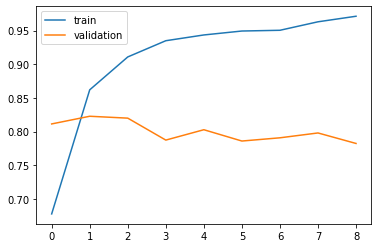

In [ ]:
# Plot history
plot_history(history)

Apply your model on your test dataset and evaluate its predictions.

In [ ]:
evaluations = model.evaluate(test_ds)
test_evaluations = {name: value for value, name in zip(evaluations, model.metrics_names)}
print(test_evaluations)

196/196 [==============================] - 1s 5ms/step - loss: 0.9089 - accuracy: 0.7532
{'loss': 0.9089375138282776, 'accuracy': 0.7531999945640564}


<details>
  <summary>Hint</summary>
    
```markdown
Check the `model.evaluate` function documentation (how could you retrieve the name of the float returned?)
```
    
</details>
​
<details>
  <summary>View solution</summary>
    
```python
evaluations = model.evaluate(test_ds)
test_evaluations = {name: value for value, name in zip(evaluations, model.metrics_names)}
print(test_evaluations)

```
</details>

## Make an end-to-end model

If you want to obtain a model capable of processing raw strings, you can simply
create a new model, using the baseline you just defined and adding as a first step the vectorize layer. You can again do that with the Keras `Sequential` API

In [ ]:
end2end_model = ...

# Test it with `raw_test_ds`, which yields raw strings
end_to_end_model.evaluate(raw_test_ds)

196/196 [==============================] - 9s 41ms/step - loss: 0.9130 - accuracy: 0.7528


[0.9089372754096985, 0.7531999945640564]

<details>
  <summary>View solution</summary>
    
```python
end2end_model = tf.keras.models.Sequential()
# A string input
end2end_model.add(tf.keras.Input(shape=(1,), dtype="string"))
# Turn strings into vocab indices
end2end_model.add(vectorize_layer)
end2end_model.add(model)

end_to_end_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)

# Test it with `raw_test_ds`, which yields raw strings
end_to_end_model.evaluate(raw_test_ds)

```
</details>

You can now apply this model on any input, so give it a try !

In [ ]:
# Create your own input
my_input_good = "I liked very much this movie"
my_input_good_2 = "This movie is not very bad though."
my_input_good_3 = "I fall asleep"
my_input_bad = "This movie is terribly bad"

# You just need to convert your string into a tensor
# YOUR CODE HERE
text_input = ...
end_to_end_model.predict(text_input)

<details>
  <summary>View solution</summary>
    
```python
text_input = tf.convert_to_tensor([my_input_good, my_input_good_2, my_input_good_3, my_input_bad], dtype=tf.string)
```
</details>

## Try out more complex architectures !

### Bi-LSTM

Here we suggest the following architecture:
- `Embedding` layer to create embedding for our entries;
- 1 or several `Bidirectional` layers (if multiple you need the first one to be a many-to-many one !)
- 1 Dense layer to add more complexity;
- 1 Dense layer for the outputs.

In [ ]:
from keras.layers import Bidirectional

def build_bi_lstm_model(embedding_dim=128, dense_dim=128):
  # YOUR CODE HERE
  return model

<details>
  <summary>View solution</summary>
    
```python
def build_bi_lstm_model(embedding_dim=128, dense_dim=128):
  # A integer input for vocab indices.
  model = Sequential()

  # Next, we add a layer to map those vocab indices into a space of dimensionality
  # 'embedding_dim'.
  model.add(Embedding(max_features, embedding_dim))
  model.add(Dropout(0.5))

  # Conv1D + global max pooling
  model.add(Bidirectional(layers.LSTM(64, return_sequences=True)))
  model.add(Bidirectional(layers.LSTM(64)))

  # We add a vanilla hidden layer:
  model.add(Dense(dense_dim, activation="relu"))
  model.add(Dropout(0.5))

  # We project onto a single unit output layer, and squash it with a sigmoid:
  model.add(Dense(1, activation="sigmoid", name="predictions"))

  # Compile the model with binary crossentropy loss and an adam optimizer.
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

  return model
```
</details>

In [ ]:
epochs = 9

bi_lstm_model = build_bi_lstm_model()
# Fit the model using the train and test datasets.
bi_lstm_history = bi_lstm_model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/9
157/157 [==============================] - 14s 57ms/step - loss: 0.6162 - accuracy: 0.6141 - val_loss: 0.3937 - val_accuracy: 0.8246
Epoch 2/9
157/157 [==============================] - 7s 46ms/step - loss: 0.3526 - accuracy: 0.8475 - val_loss: 0.4185 - val_accuracy: 0.8196
Epoch 3/9
157/157 [==============================] - 7s 45ms/step - loss: 0.2469 - accuracy: 0.9029 - val_loss: 0.4731 - val_accuracy: 0.8054
Epoch 4/9
157/157 [==============================] - 7s 45ms/step - loss: 0.1725 - accuracy: 0.9358 - val_loss: 0.5011 - val_accuracy: 0.8052
Epoch 5/9
157/157 [==============================] - 7s 45ms/step - loss: 0.1241 - accuracy: 0.9548 - val_loss: 0.7450 - val_accuracy: 0.7734
Epoch 6/9
157/157 [==============================] - 7s 46ms/step - loss: 0.0977 - accuracy: 0.9640 - val_loss: 0.7192 - val_accuracy: 0.8006
Epoch 7/9
157/157 [==============================] - 7s 46ms/step - loss: 0.0710 - accuracy: 0.9740 - val_loss: 0.8597 - val_accuracy: 0.8040
Epoch

### 1D-Convnet

Here we suggest the following architecture:
- `Embedding` layer to create embedding for our entries;
- eventually a Dropout after for regularization;
- 2 layers 1D `Conv1D`
- 1 GlobalMaxPooling1D layer to pool;
- 1 Dense layer for the outputs.

In [ ]:
from keras.layers import Conv1D, GlobalMaxPooling1D

def build_cnn_model(embedding_dim=128, conv_dim=128, num_filters=7):
  # YOUR CODE HERE
  return model

<details>
  <summary>View solution</summary>
    
```python
from keras.layers import Conv1D, GlobalMaxPooling1D

def build_cnn_model(embedding_dim=128, conv_dim=128, num_filters=7):
  # A integer input for vocab indices.
  model = Sequential()

  # Next, we add a layer to map those vocab indices into a space of dimensionality
  # 'embedding_dim'.
  model.add(Embedding(max_features, embedding_dim))
  model.add(Dropout(0.5))

  # Conv1D + global max pooling
  model.add(Conv1D(conv_dim, num_filters, padding="valid", activation="relu", strides=3))
  model.add(Conv1D(conv_dim, num_filters, padding="valid", activation="relu", strides=3))
  model.add(GlobalMaxPooling1D())

  # We add a vanilla hidden layer:
  model.add(Dense(conv_dim, activation="relu"))
  model.add(Dropout(0.5))

  # We project onto a single unit output layer, and squash it with a sigmoid:
  model.add(Dense(1, activation="sigmoid", name="predictions"))

  # Compile the model with binary crossentropy loss and an adam optimizer.
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

  return model
```
</details>

In [ ]:
epochs = 9

cnn_model = build_cnn_model()
# Fit the model using the train and test datasets.
cnn_history = cnn_model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/9
157/157 [==============================] - 6s 32ms/step - loss: 0.6861 - accuracy: 0.5211 - val_loss: 0.4645 - val_accuracy: 0.7806
Epoch 2/9
157/157 [==============================] - 5s 31ms/step - loss: 0.4473 - accuracy: 0.7964 - val_loss: 0.4323 - val_accuracy: 0.8102
Epoch 3/9
157/157 [==============================] - 5s 30ms/step - loss: 0.2618 - accuracy: 0.8996 - val_loss: 0.5236 - val_accuracy: 0.7990
Epoch 4/9
157/157 [==============================] - 5s 30ms/step - loss: 0.1451 - accuracy: 0.9495 - val_loss: 0.6559 - val_accuracy: 0.7948
Epoch 5/9
157/157 [==============================] - 5s 30ms/step - loss: 0.0952 - accuracy: 0.9660 - val_loss: 0.8134 - val_accuracy: 0.7830
Epoch 6/9
157/157 [==============================] - 5s 31ms/step - loss: 0.0773 - accuracy: 0.9716 - val_loss: 0.8962 - val_accuracy: 0.7988
Epoch 7/9
157/157 [==============================] - 5s 31ms/step - loss: 0.0497 - accuracy: 0.9830 - val_loss: 1.0438 - val_accuracy: 0.7940
Epoch 